In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pickle
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

In [2]:
data = pd.read_csv('bca.csv', parse_dates=['Date'], index_col='Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,9400.0,9425.0,9350.0,9425.0,9166.983398,30545200
2024-01-03,9425.0,9425.0,9325.0,9350.0,9094.036133,34603300
2024-01-04,9400.0,9475.0,9375.0,9475.0,9215.614258,56501800
2024-01-05,9500.0,9600.0,9475.0,9575.0,9312.876953,85290100
2024-01-08,9600.0,9625.0,9475.0,9575.0,9312.876953,50896000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2024-01-02 to 2024-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       215 non-null    float64
 1   High       215 non-null    float64
 2   Low        215 non-null    float64
 3   Close      215 non-null    float64
 4   Adj Close  215 non-null    float64
 5   Volume     215 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 11.8 KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,215.000000,215.000000,215.000000,215.000000,215.000000,2.150000e+02
mean,9983.255814,10061.860465,9897.790698,9979.534884,9875.637654,8.130079e+07
std,405.703905,403.979942,408.171931,413.039245,446.473232,5.894944e+07
min,9000.000000,9250.000000,8775.000000,9000.000000,8955.334961,2.465800e+07
25%,9650.000000,9750.000000,9575.000000,9625.000000,9477.729492,5.361080e+07
50%,10000.000000,10050.000000,9900.000000,10000.000000,9872.135742,6.869090e+07
75%,10300.000000,10350.000000,10200.000000,10300.000000,10248.882812,9.265105e+07
max,10900.000000,10950.000000,10775.000000,10950.000000,10895.657227,7.564316e+08


In [5]:
data.insert(0, "Date", data.index, True)
data.reset_index(drop=True,inplace=True)

In [6]:
print(data.columns)

data.head()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-02,9400.0,9425.0,9350.0,9425.0,9166.983398,30545200
1,2024-01-03,9425.0,9425.0,9325.0,9350.0,9094.036133,34603300
2,2024-01-04,9400.0,9475.0,9375.0,9475.0,9215.614258,56501800
3,2024-01-05,9500.0,9600.0,9475.0,9575.0,9312.876953,85290100
4,2024-01-08,9600.0,9625.0,9475.0,9575.0,9312.876953,50896000


In [7]:
fig = px.line(data, x = 'Date', y = 'Close', title='BCA Stock Price')
fig.show()

In [8]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
  result = adfuller(df)
  print('ADF Stationarity: %f' % result[0])
  print('p-Value: %f' % result[1])
  if result[1] <= 0.05:
    print("reject the null hypothesis. Data is stationary")
  else :
    print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(data['Close'])

ADF Stationarity: -1.938923
p-Value: 0.313978
Fail to reject the null hypothesis. Data is not stationary


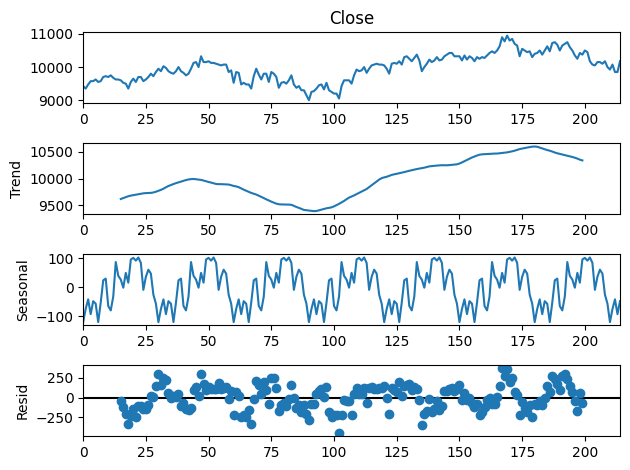

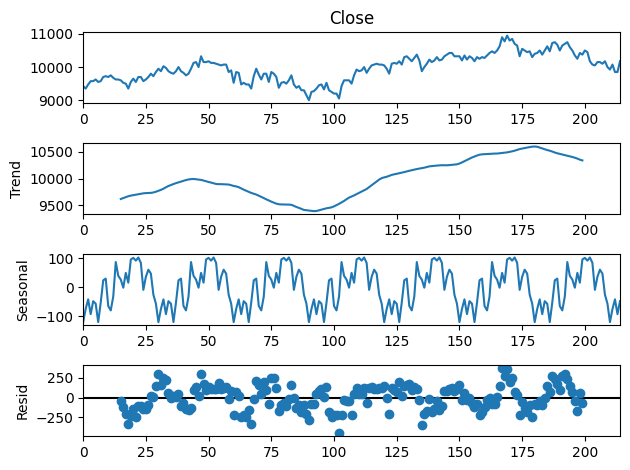

In [9]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data['Close'], model='additive', period = 30)
decompose.plot()

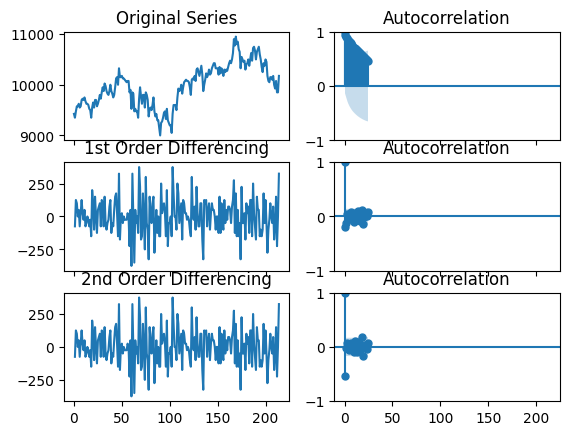

In [10]:
# original series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0,0].plot(data['Close']); axes[0, 0].set_title('Original Series')
plot_acf(data['Close'], ax=axes[0,1])

# 1st differencing
axes[1,0].plot(data['Close'].diff()); axes[1,0].set_title('1st Order Differencing')
plot_acf(data['Close'].diff().dropna(), ax=axes[1,1])

# 2nd differencing
axes[2,0].plot(data['Close'].diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(data['Close'].diff().diff().dropna(), ax=axes[2,1])

plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  329
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1998.984
Date:                Tue, 17 Dec 2024   AIC                           4003.967
Time:                        21:40:49   BIC                           4015.346
Sample:                    01-02-2024   HQIC                          4008.507
                         - 11-25-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5581      0.159      3.504      0.000       0.246       0.870
ma.L1         -0.7199      0.141     -5.093      0.000      -0.997      -0.443
sigma2       1.15e+04    635.144     18.103      0.0

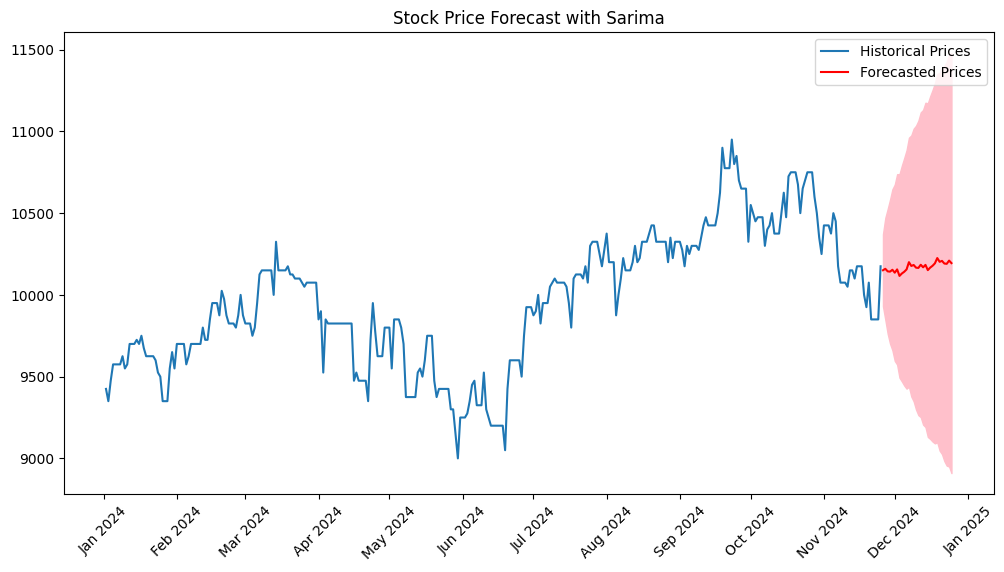

In [ ]:
# Load dataset
data = pd.read_csv('bca.csv', parse_dates=['Date'], index_col='Date')
data = data.asfreq('D')  
data.fillna(method='ffill', inplace=True)  

model = auto_arima(data['Close'], seasonal=True, m=12)  
print(model.summary())

order = (1, 1, 1)  
seasonal_order = (1, 1, 1, 12)  

sarima_model = SARIMAX(data['Close'], order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()
print(sarima_results.summary())

# Forecasting future values
n_periods = 30 
forecast = sarima_results.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=n_periods)
forecast_values = forecast.predicted_mean

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Historical Prices')
plt.plot(forecast_index, forecast_values, label='Forecasted Prices', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int()['lower Close'],
                 forecast.conf_int()['upper Close'], color='pink')

# Format the date to show month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Stock Price Forecast with Sarima')
plt.legend()
plt.xticks(rotation=45)
plt.show()



                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  329
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1997.110
Date:                Tue, 17 Dec 2024   AIC                           4000.220
Time:                        21:44:38   BIC                           4011.599
Sample:                    01-02-2024   HQIC                          4004.760
                         - 11-25-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5994      0.141      4.264      0.000       0.324       0.875
ma.L1         -0.7572      0.124     -6.118      0.000      -1.000      -0.515
sigma2      1.137e+04    634.886     17.902      0.0

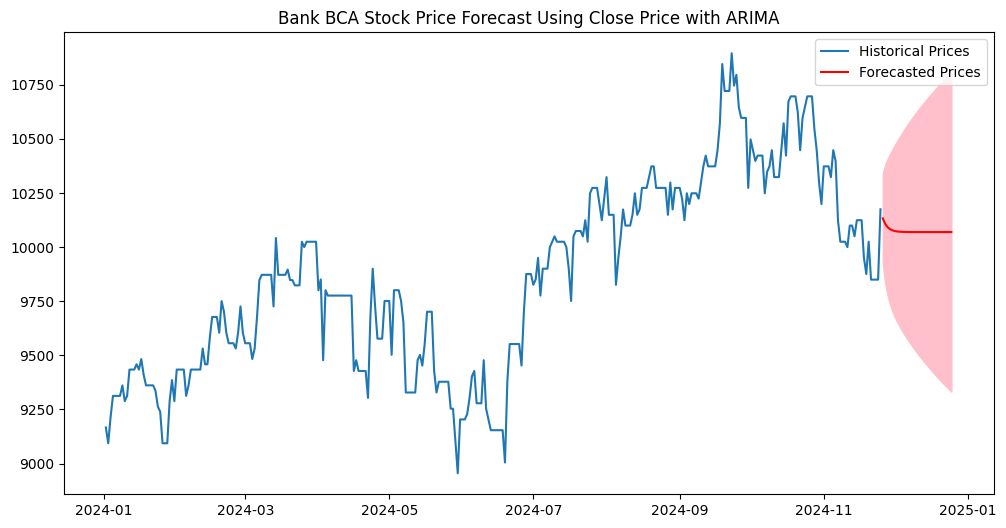

In [27]:
# Load dataset
data = data.asfreq('D')  
data.fillna(method='ffill', inplace=True)  

order = (1, 1, 1)  

# Fit ARIMA model using Close price
arima_model = ARIMA(data['Adj Close'], order=order)
arima_results = arima_model.fit()
print(arima_results.summary())

# Forecasting future values for Close price
n_periods = 30
forecast_close = arima_results.get_forecast(steps=n_periods)
forecast_index_close = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=n_periods)
forecast_values_close = forecast_close.predicted_mean

# Plotting the results with customized title
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label='Historical Prices')
plt.plot(forecast_index_close, forecast_values_close, label='Forecasted Prices', color='red')
plt.fill_between(forecast_index_close,
                 forecast_close.conf_int()['lower Adj Close'],
                 forecast_close.conf_int()['upper Adj Close'], color='pink')
plt.title('Bank BCA Stock Price Forecast Using Close Price with ARIMA')
plt.legend(loc="best")
plt.show()

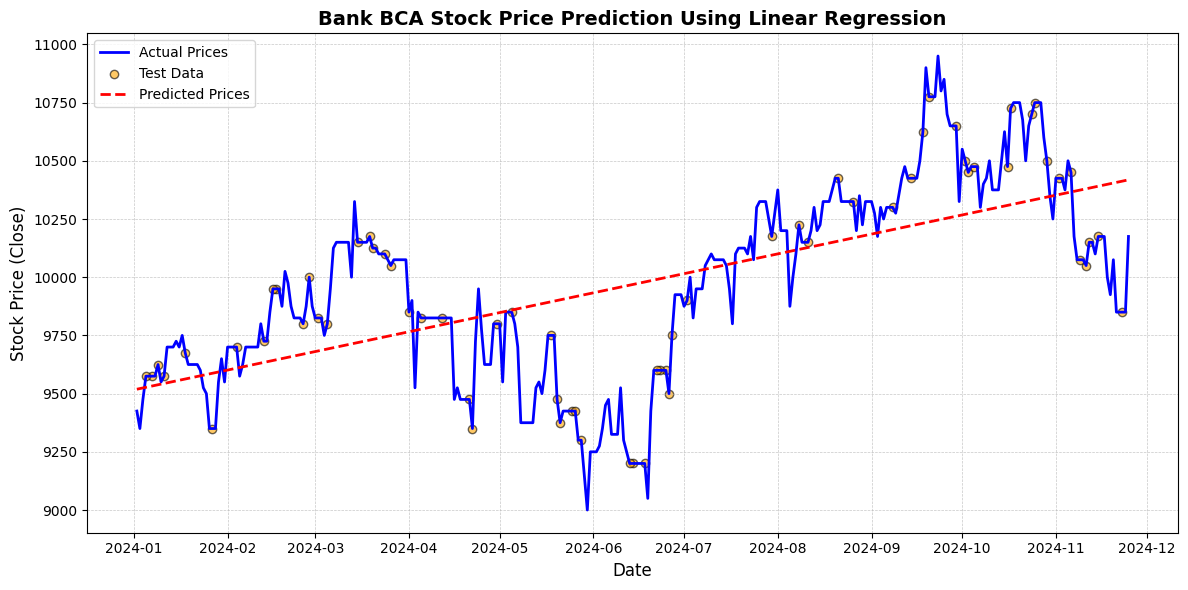

In [28]:
# Load dataset 
data.fillna(method='ffill', inplace=True) 

data['Days'] = (data.index - data.index[0]).days  

X = data[['Days']]  
y = data['Close']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Make predictions on the entire dataset for plotting purposes
y_full_pred = model.predict(X)

# plotting
plt.figure(figsize=(12, 6)) 
plt.plot(data.index, data['Close'], label='Actual Prices', color='blue', linewidth=2)
plt.scatter(X_test.index, y_test, color='orange', label='Test Data', alpha=0.6, edgecolor='k')
plt.plot(data.index, y_full_pred, label='Predicted Prices', color='red', linestyle='--', linewidth=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Bank BCA Stock Price Prediction Using Linear Regression', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (Close)', fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()

with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)
